In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
train = pd.read_csv('/content/drive/MyDrive/bike share/train.csv')
test = pd.read_csv('/content/drive/MyDrive/bike share/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [ ]:
# Display basic info
print("Training Data Info:")
train.info()



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
print("\nTest Data Info:")
test.info()


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train.isnull().sum())

print("\nMissing Values in Test Data:")
print(test.isnull().sum())


Missing Values in Training Data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Missing Values in Test Data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


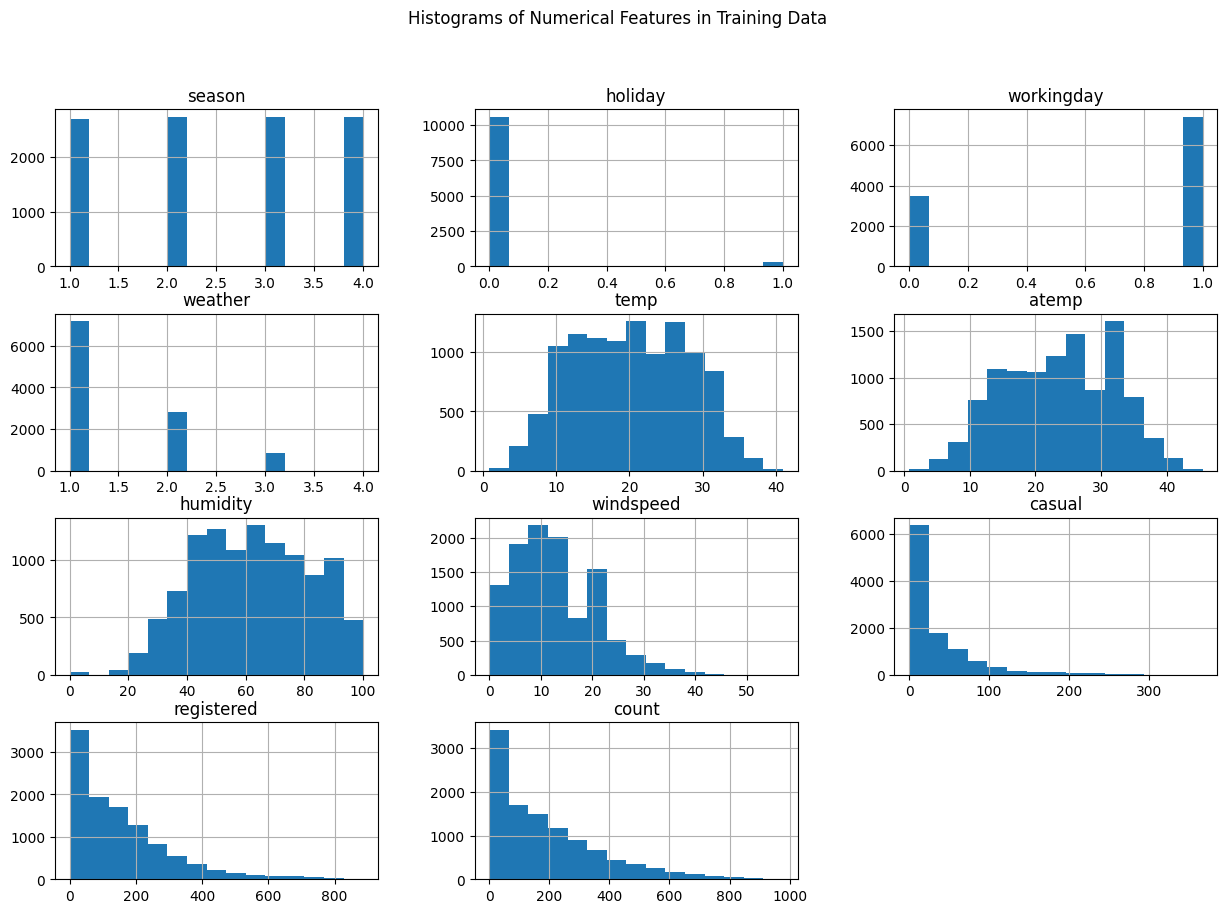

In [ ]:
# Histograms for numerical features
train.hist(figsize=(15, 10), bins=15)
plt.suptitle("Histograms of Numerical Features in Training Data")
plt.show()



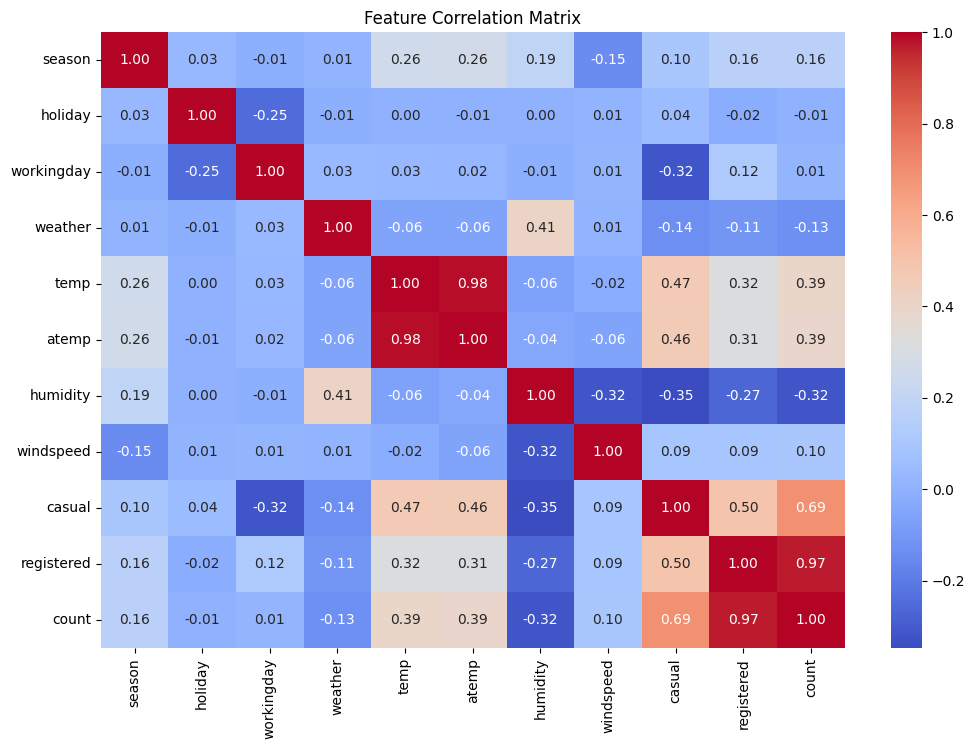

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_features = train.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

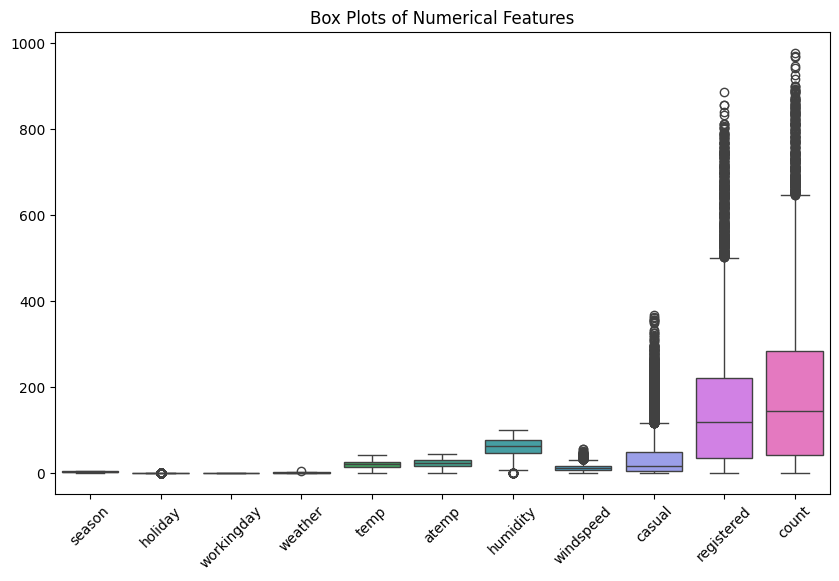

In [ ]:
# Box plots to detect outliers in key numerical columns
numerical_features = train.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[numerical_features])
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Features")
plt.show()


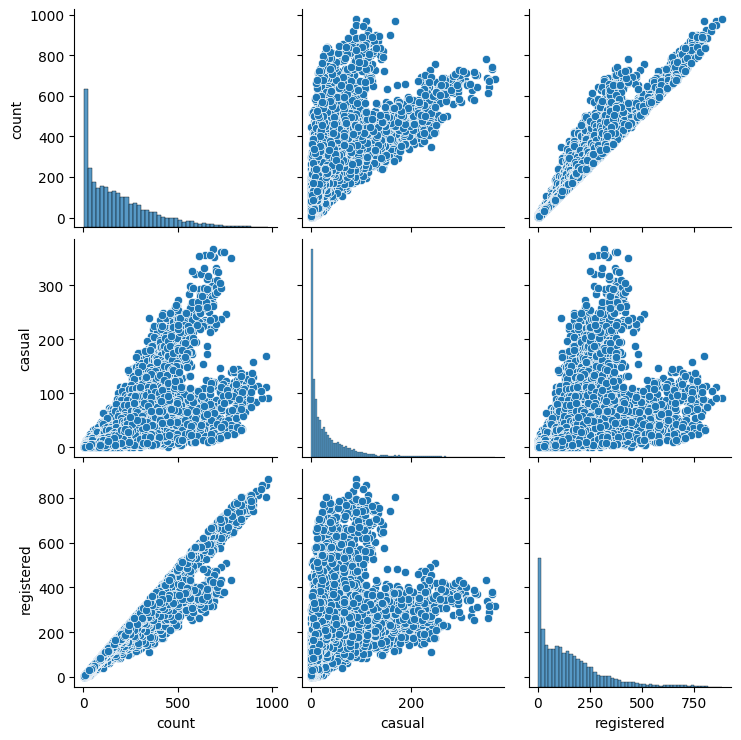

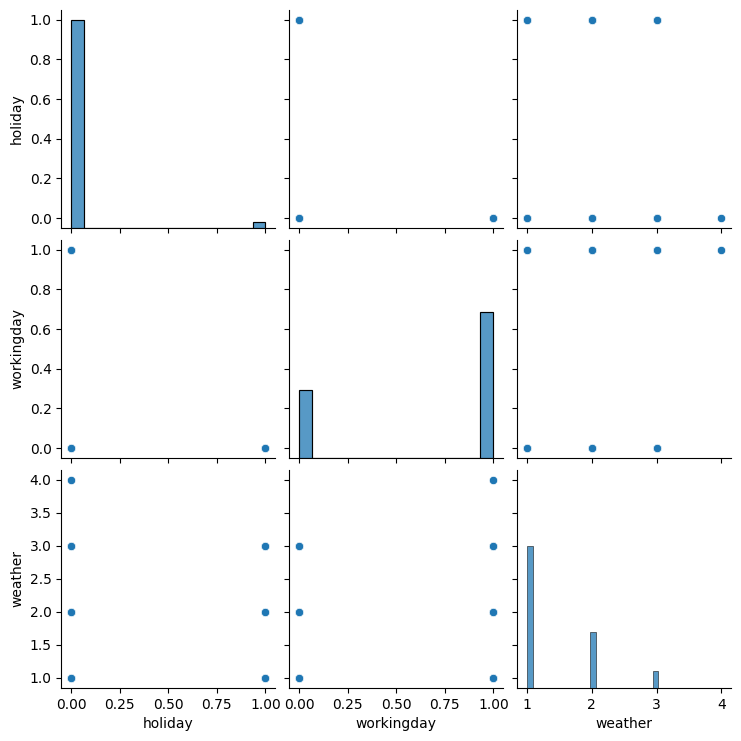

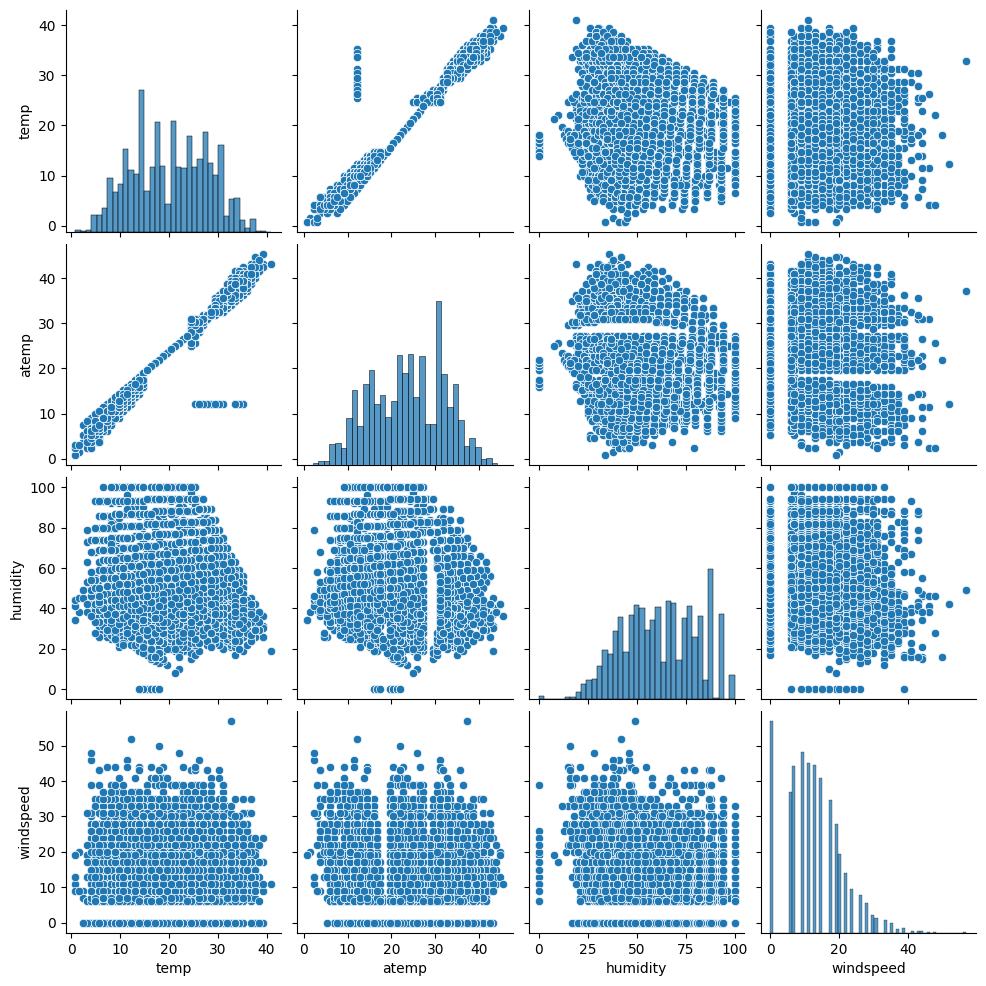

In [ ]:
# Pair plots for key columns
col_study = ['count', 'casual', 'registered']
sns.pairplot(train[col_study], height=2.5)
plt.show()

col_study = ['holiday', 'workingday', 'weather']
sns.pairplot(train[col_study], height=2.5)
plt.show()

col_study = ['temp', 'atemp', 'humidity', 'windspeed']
sns.pairplot(train[col_study], height=2.5)
plt.show()


            season  holiday  workingday  weather  temp  atemp  humidity  \
season        1.00     0.03       -0.01     0.01  0.26   0.26      0.19   
holiday       0.03     1.00       -0.25    -0.01  0.00  -0.01      0.00   
workingday   -0.01    -0.25        1.00     0.03  0.03   0.02     -0.01   
weather       0.01    -0.01        0.03     1.00 -0.06  -0.06      0.41   
temp          0.26     0.00        0.03    -0.06  1.00   0.98     -0.06   
atemp         0.26    -0.01        0.02    -0.06  0.98   1.00     -0.04   
humidity      0.19     0.00       -0.01     0.41 -0.06  -0.04      1.00   
windspeed    -0.15     0.01        0.01     0.01 -0.02  -0.06     -0.32   
casual        0.10     0.04       -0.32    -0.14  0.47   0.46     -0.35   
registered    0.16    -0.02        0.12    -0.11  0.32   0.31     -0.27   
count         0.16    -0.01        0.01    -0.13  0.39   0.39     -0.32   

            windspeed  casual  registered  count  
season          -0.15    0.10        0.16   0.16

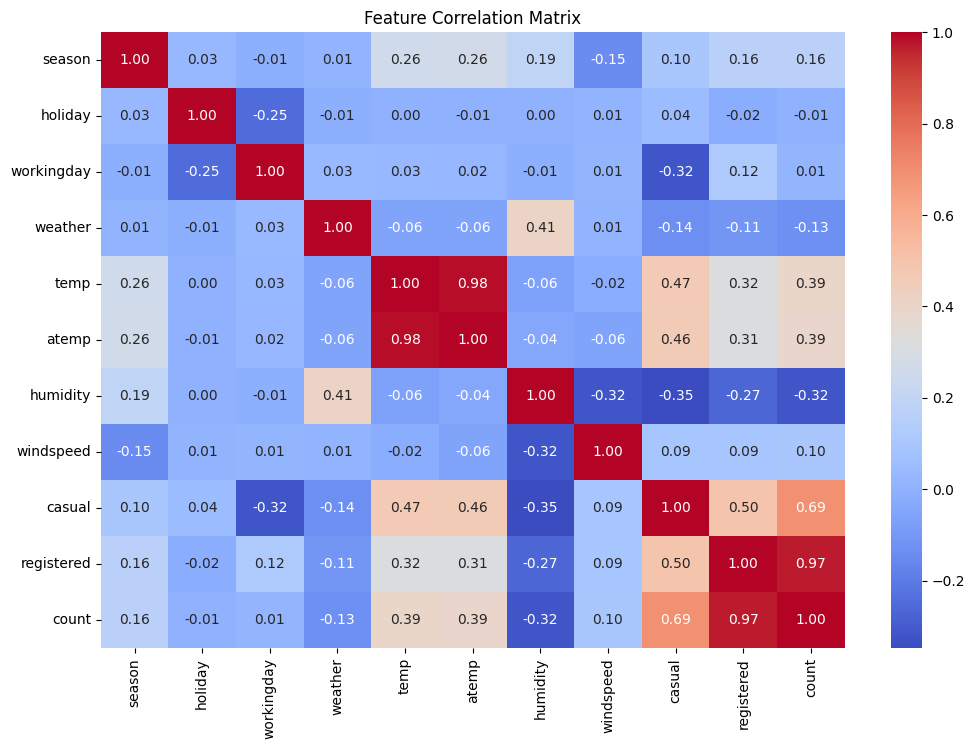

In [ ]:
# Set float formatting for display
pd.options.display.float_format = '{:,.2f}'.format

# Calculate the correlation matrix for the numerical columns
correlation_matrix = train.corr(numeric_only=True)
print(correlation_matrix)

# Display the correlation heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Prepare the data for model training
# Assuming 'count' is the target variable
X = train.drop('count', axis=1)  # Features (drop the target variable)
y = train['count']  # Target variable (bike share count)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
train = pd.read_csv('/content/drive/MyDrive/bike share/train.csv')
test = pd.read_csv('/content/drive/MyDrive/bike share/test.csv')

# Convert 'datetime' column to datetime type and extract features
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

# Drop the original 'datetime' column
train = train.drop(columns=['datetime'])
test = test.drop(columns=['datetime'])

# Handle categorical columns (if any)
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Assuming 'X' is the feature matrix and 'y' is the target variable
X = train.drop(columns=['count'])  # Replace 'count' with your target column
y = train['count']  # Replace 'count' with your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Train models and store them
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")

# Evaluate models
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Evaluation Metrics:")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}\n")


Linear Regression trained successfully.
Decision Tree Regressor trained successfully.
Random Forest Regressor trained successfully.
XGBoost Regressor trained successfully.
Linear Regression Evaluation Metrics:
  Mean Absolute Error: 0.00
  Mean Squared Error: 0.00
  Root Mean Squared Error: 0.00
  R-squared: 1.00

Decision Tree Regressor Evaluation Metrics:
  Mean Absolute Error: 15.89
  Mean Squared Error: 567.44
  Root Mean Squared Error: 23.82
  R-squared: 0.98

Random Forest Regressor Evaluation Metrics:
  Mean Absolute Error: 1.27
  Mean Squared Error: 10.45
  Root Mean Squared Error: 3.23
  R-squared: 1.00

XGBoost Regressor Evaluation Metrics:
  Mean Absolute Error: 2.35
  Mean Squared Error: 22.39
  Root Mean Squared Error: 4.73
  R-squared: 1.00



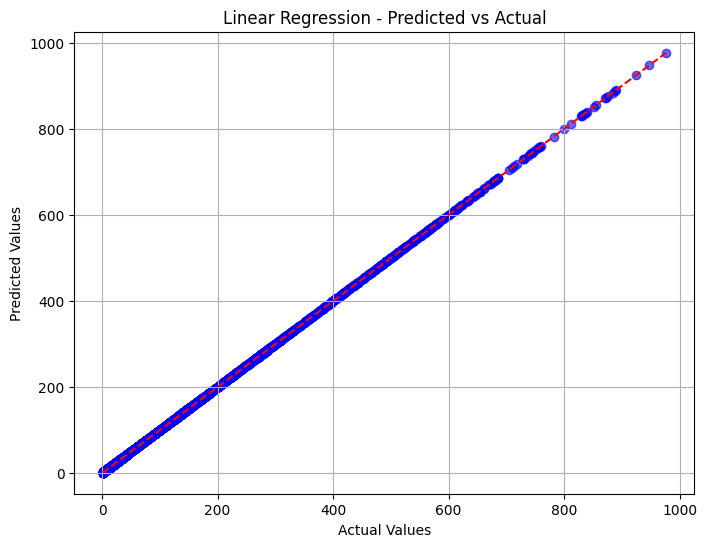

Linear Regression Evaluation Metrics:
  Mean Absolute Error: 0.00
  Mean Squared Error: 0.00
  Root Mean Squared Error: 0.00
  R-squared: 1.00



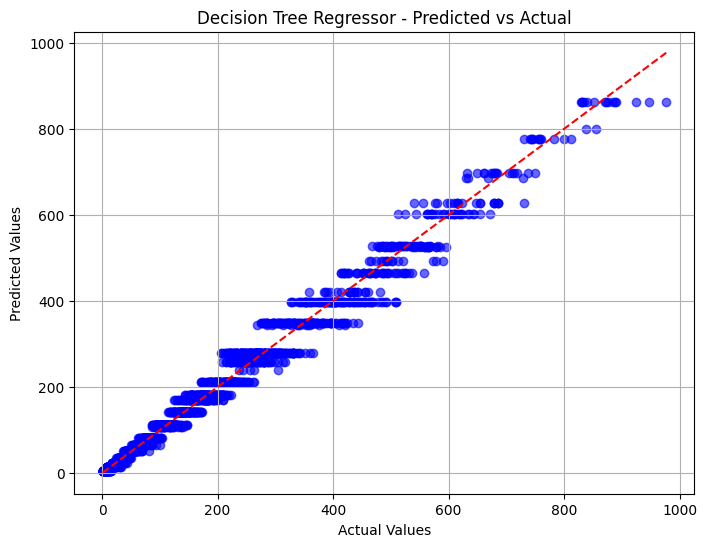

Decision Tree Regressor Evaluation Metrics:
  Mean Absolute Error: 15.89
  Mean Squared Error: 567.44
  Root Mean Squared Error: 23.82
  R-squared: 0.98



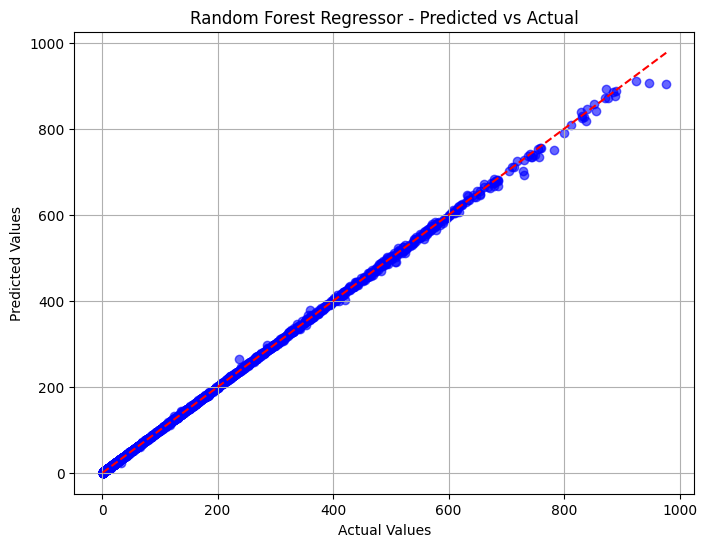

Random Forest Regressor Evaluation Metrics:
  Mean Absolute Error: 1.27
  Mean Squared Error: 10.45
  Root Mean Squared Error: 3.23
  R-squared: 1.00



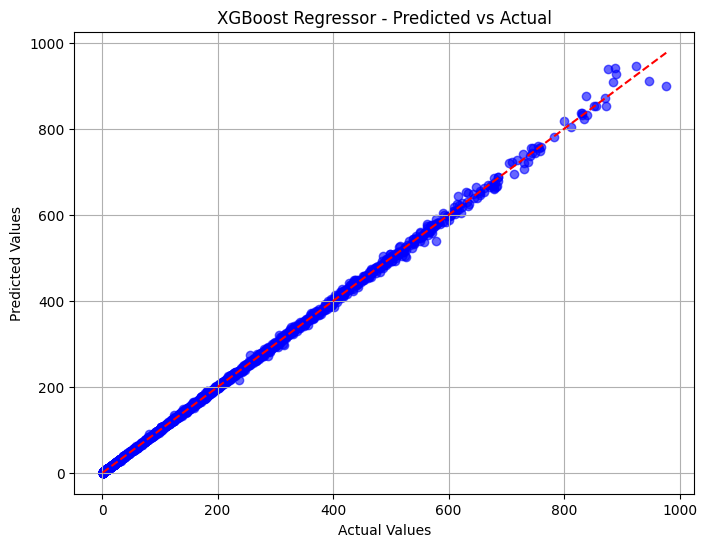

XGBoost Regressor Evaluation Metrics:
  Mean Absolute Error: 2.35
  Mean Squared Error: 22.39
  Root Mean Squared Error: 4.73
  R-squared: 1.00



In [ ]:


# Evaluate models and plot predicted vs actual values
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Plot the predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"{name} - Predicted vs Actual")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

    # Optionally, print evaluation metrics as well
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Evaluation Metrics:")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}\n")


In [ ]:


# Initialize lists to store metrics for each model
model_names = []
r2_scores = []
rmse_scores = []

# Evaluate models and collect metrics
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics
    model_names.append(name)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    # Optionally, print individual evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  R-squared: {r2:.2f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}\n")



Linear Regression Evaluation Metrics:
  R-squared: 1.00
  Root Mean Squared Error: 0.00
  Mean Absolute Error: 0.00

Decision Tree Regressor Evaluation Metrics:
  R-squared: 0.98
  Root Mean Squared Error: 23.82
  Mean Absolute Error: 15.89

Random Forest Regressor Evaluation Metrics:
  R-squared: 1.00
  Root Mean Squared Error: 3.23
  Mean Absolute Error: 1.27

XGBoost Regressor Evaluation Metrics:
  R-squared: 1.00
  Root Mean Squared Error: 4.73
  Mean Absolute Error: 2.35



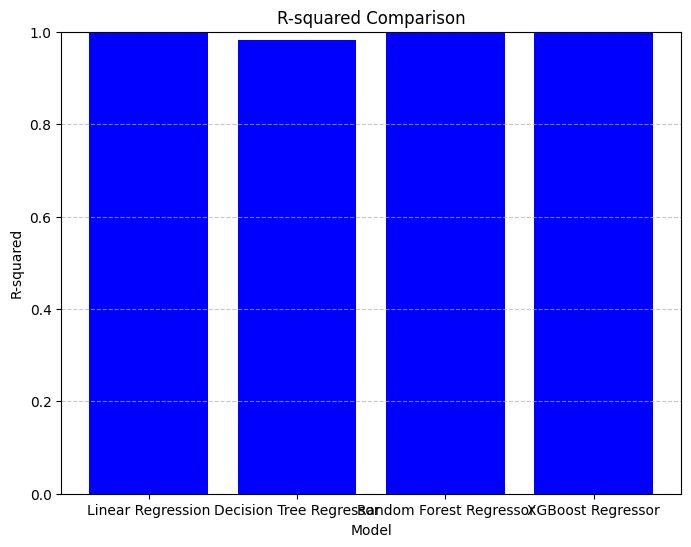

In [ ]:
# Plot R-squared scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color='blue')
plt.title('R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.ylim([0, 1])  # R-squared values range from 0 to 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()




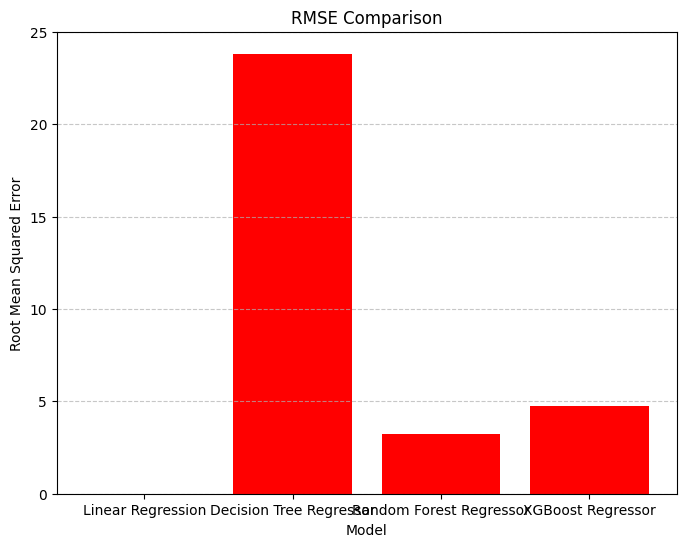

In [ ]:
# Plot RMSE scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_scores, color='red')
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='r2', verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nOptimized Random Forest Evaluation Metrics:")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  Root Mean Squared Error: {rmse:.2f}")
print(f"  R-squared: {r2:.2f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Optimized Random Forest Evaluation Metrics:
  Mean Absolute Error: 1.23
  Mean Squared Error: 10.07
  Root Mean Squared Error: 3.17
  R-squared: 1.00


Feature Importances:
       Feature  Importance
9   registered        0.95
8       casual        0.05
6     humidity        0.00
14     weekday        0.00
7    windspeed        0.00
4         temp        0.00
12         day        0.00
13        hour        0.00
5        atemp        0.00
11       month        0.00
0       season        0.00
3      weather        0.00
2   workingday        0.00
10        year        0.00
1      holiday        0.00


<ipython-input-44-c4a6c4e06e32>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


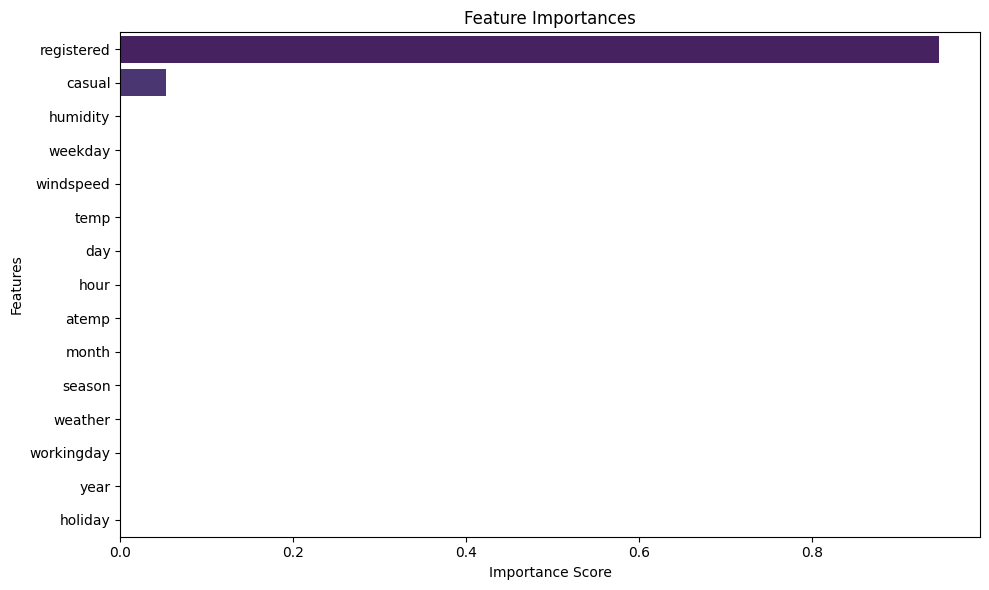

In [ ]:
# Extract feature importance from the optimized Random Forest model
feature_importances = best_rf.feature_importances_
features = X.columns  # Get feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define scoring metrics
r2_scorer = make_scorer(r2_score)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(best_rf, X, y, cv=5, scoring=r2_scorer)
mean_r2 = cv_r2_scores.mean()
std_r2 = cv_r2_scores.std()

# Perform cross-validation for RMSE
cv_rmse_scores = cross_val_score(best_rf, X, y, cv=5, scoring=rmse_scorer)
mean_rmse = cv_rmse_scores.mean()
std_rmse = cv_rmse_scores.std()

# Display results
print(f"Cross-Validation Results (5-fold):")
print(f"  R-squared: Mean = {mean_r2:.2f}, Std Dev = {std_r2:.2f}")
print(f"  RMSE: Mean = {mean_rmse:.2f}, Std Dev = {std_rmse:.2f}")


Cross-Validation Results (5-fold):
  R-squared: Mean = 1.00, Std Dev = 0.00
  RMSE: Mean = 4.86, Std Dev = 2.90


In [ ]:
import joblib

# Save the optimized Random Forest model
model_filename = '/content/drive/MyDrive/bike_share_optimized_rf_model.pkl'
joblib.dump(best_rf, model_filename)
print(f"Model saved as {model_filename}")

# Load the model to test
loaded_model = joblib.load(model_filename)

# Test the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print("\nLoaded Model Evaluation Metrics:")
print(f"  Mean Absolute Error: {mae_loaded:.2f}")
print(f"  R-squared: {r2_loaded:.2f}")


Model saved as /content/drive/MyDrive/bike_share_optimized_rf_model.pkl

Loaded Model Evaluation Metrics:
  Mean Absolute Error: 1.23
  R-squared: 1.00


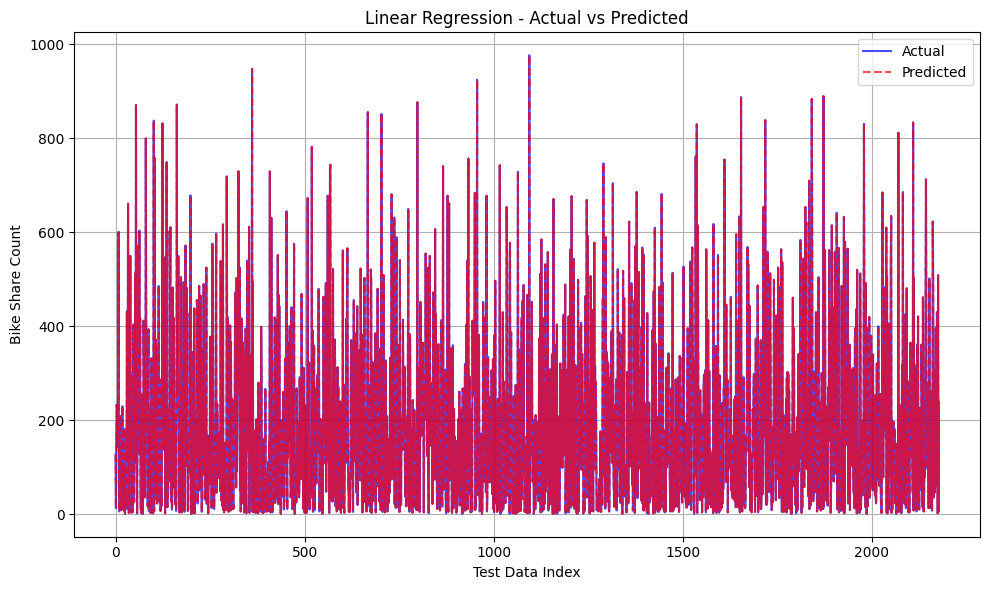

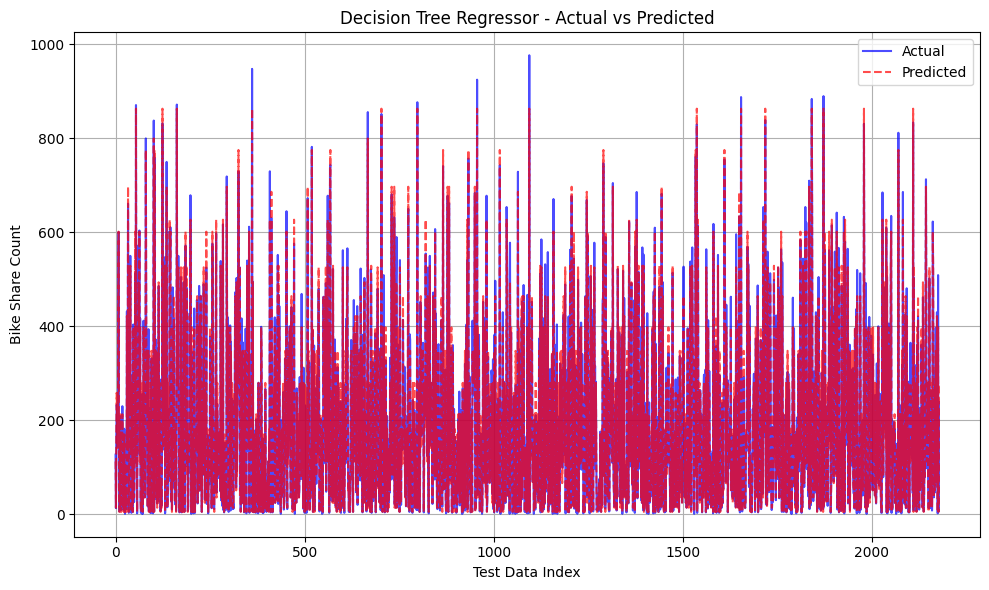

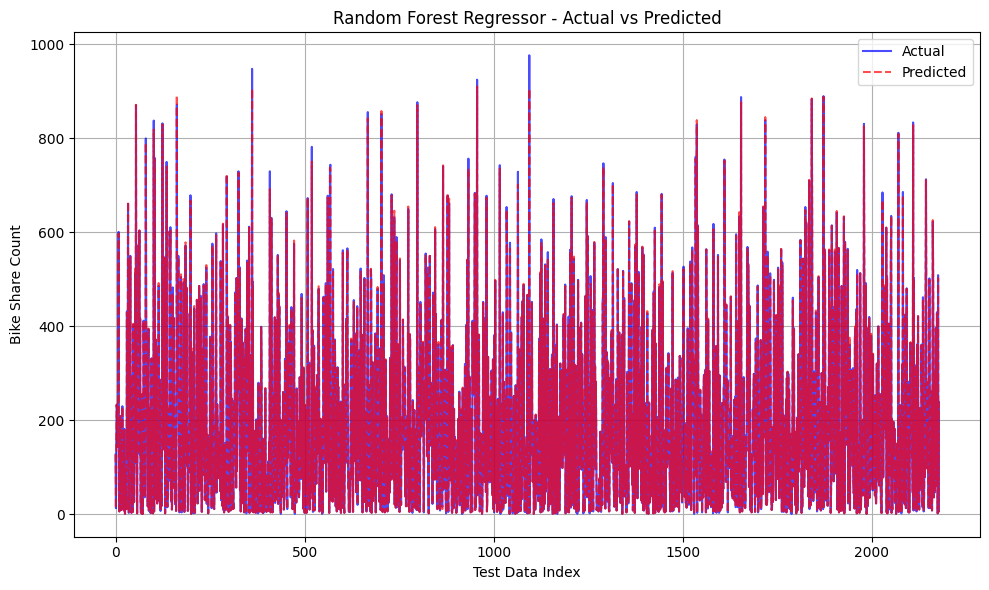

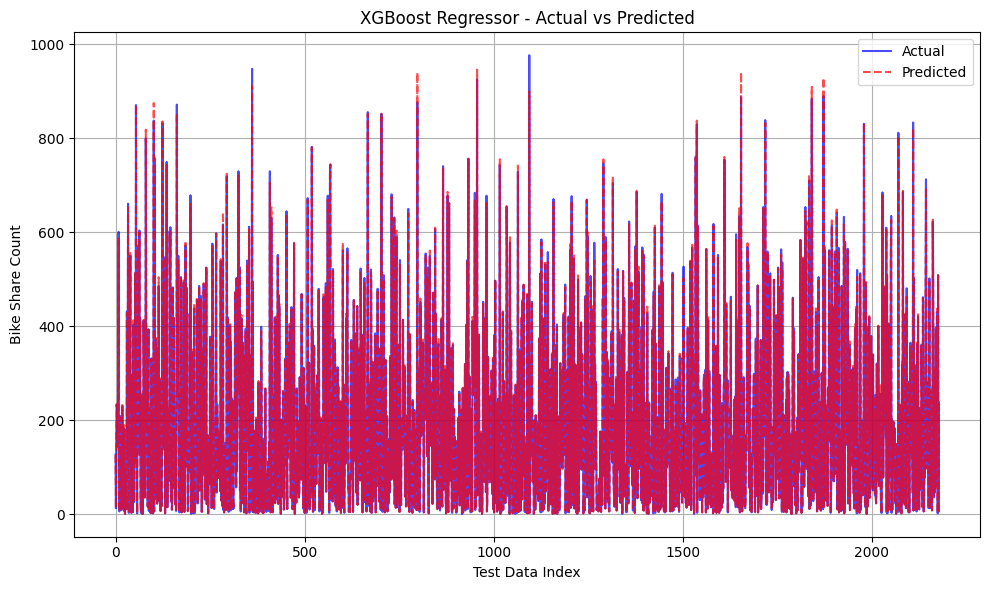

In [ ]:
# Loop through each trained model and plot Actual vs Predicted
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual', color='blue', alpha=0.7)
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--', alpha=0.7)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Test Data Index")
    plt.ylabel("Bike Share Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import statsmodels.api as sm

# Add a constant to the features (for the intercept term)
X_train_with_intercept = sm.add_constant(X_train)

# Fit a linear regression model using statsmodels
linear_model = sm.OLS(y_train, X_train_with_intercept).fit()

# Display the summary (including p-values)
print("Linear Regression Model Summary:")
print(linear_model.summary())


Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.735e+29
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:50:03   Log-Likelihood:             2.1372e+05
No. Observations:                8708   AIC:                        -4.274e+05
Df Residuals:                    8692   BIC:                        -4.273e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.638e-

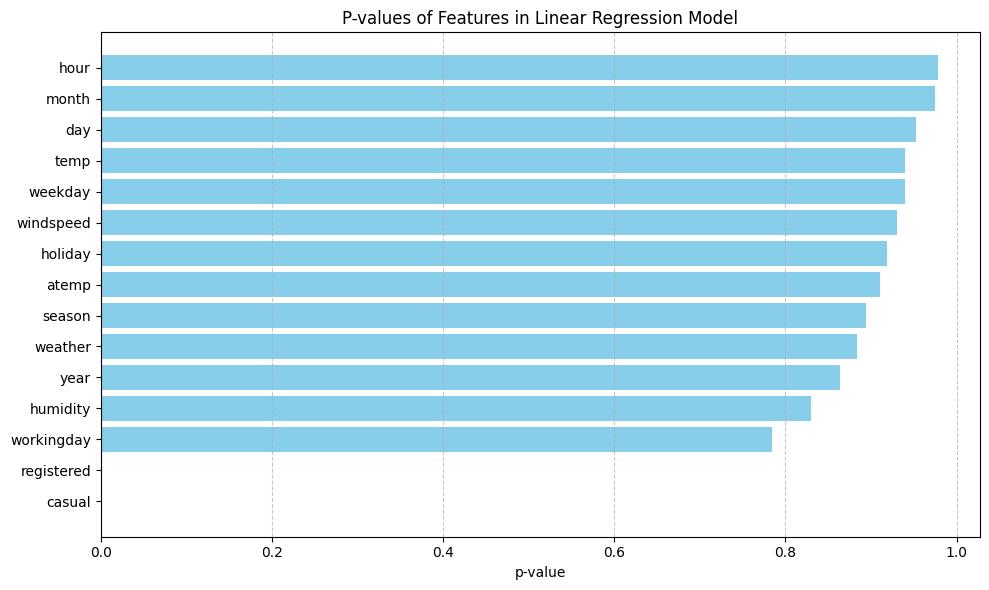

In [ ]:
import matplotlib.pyplot as plt

# Extract p-values and feature names
p_values = linear_model.pvalues[1:]  # Skip the intercept (constant) p-value
features = X_train.columns

# Create a DataFrame to store the feature names and p-values
p_value_df = pd.DataFrame({
    'Feature': features,
    'p-value': p_values
}).sort_values(by='p-value')

# Plot the p-values in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(p_value_df['Feature'], p_value_df['p-value'], color='skyblue')
plt.xlabel('p-value')
plt.title('P-values of Features in Linear Regression Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


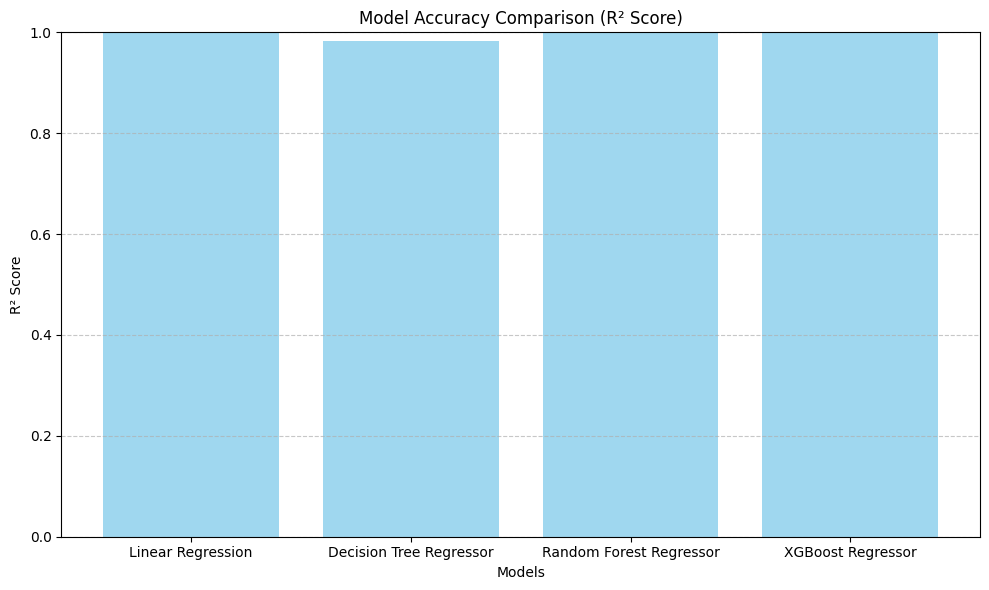

In [ ]:
# Initialize lists to store model names and their R² scores
model_names = []
r2_scores = []

# Collect R² scores for each model
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    r2_scores.append(r2)

# Create a bar chart for model R² scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue', alpha=0.8)
plt.title("Model Accuracy Comparison (R² Score)")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.ylim([0, 1])  # R² scores range from 0 to 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
